<a href="https://colab.research.google.com/github/ltt14/PRODIGY_ML_02/blob/main/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 is to create a K-means clustering algorithm that groups customers of a retail store based on their purchase history.**


In [1]:
!git clone https://github.com/ltt14/PRODIGY_ML_02.git

Cloning into 'PRODIGY_ML_02'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 296.08 KiB | 4.55 MiB/s, done.


Importing important libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dataset

The dataset used was gotten from GitHub(Machine-Learning-with-Python/Datasets
/Mall_Customers.csv). It was downloaded to my device and then uploaded onto the Notebook.

In [3]:
print(os.getcwd())
import pandas as pd

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Mall_Customers.csv')


/content


Saving Mall_Customers.csv to Mall_Customers.csv


About Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


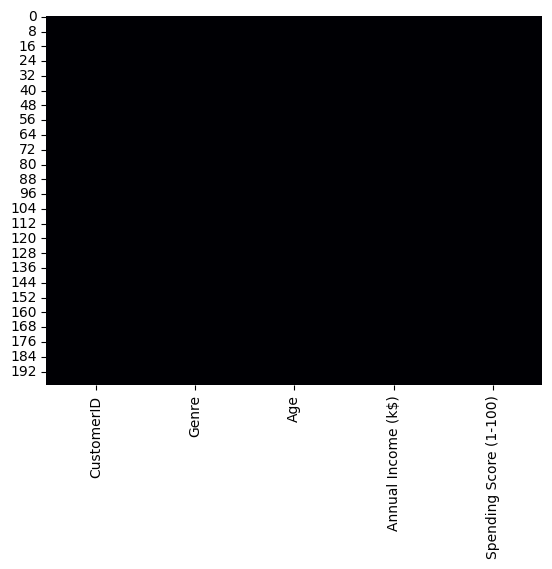

In [6]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

No null values present in the data

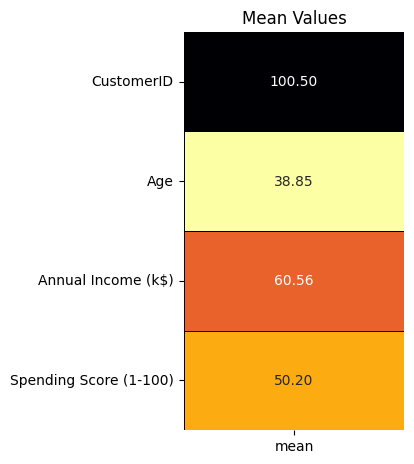

In [7]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (4.5,5))

plt.subplot(1,1,1)
sns.heatmap(df.describe().T[['mean']],cmap = 'inferno_r',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 2)

Average customer Age in the dataset is in the late 30s i.e 38.85.
Average Annual Income (k$) of the customers is 60.56
Spending Score (1-100) average of the mall customer is in the center with 50.20

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [9]:
df[["Annual Income (k$)_T","Spending Score (1-100)_T"]] = scalar.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T
0,1,Male,19,15,39,-1.738999,-0.434801
1,2,Male,21,15,81,-1.738999,1.195704
2,3,Female,20,16,6,-1.700830,-1.715913
3,4,Female,23,16,77,-1.700830,1.040418
4,5,Female,31,17,40,-1.662660,-0.395980
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061
196,197,Female,45,126,28,2.497807,-0.861839
197,198,Male,32,126,74,2.497807,0.923953
198,199,Male,32,137,18,2.917671,-1.250054


# Identifying the Optimum Number of Clusters

An elbow curve was plotted to determine the optimum value of k for the K-Means Cluster.

In [10]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


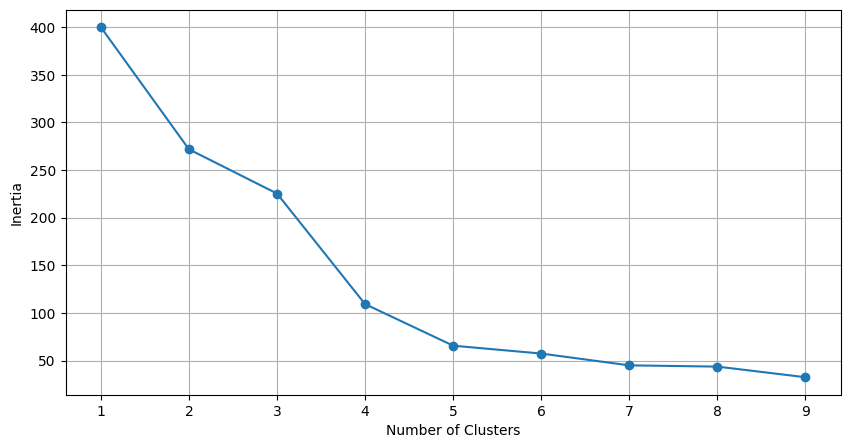

In [11]:
optimise_k_means(data=df[["Annual Income (k$)_T","Spending Score (1-100)_T"]], max_k=10)

# Silhouette Score Method

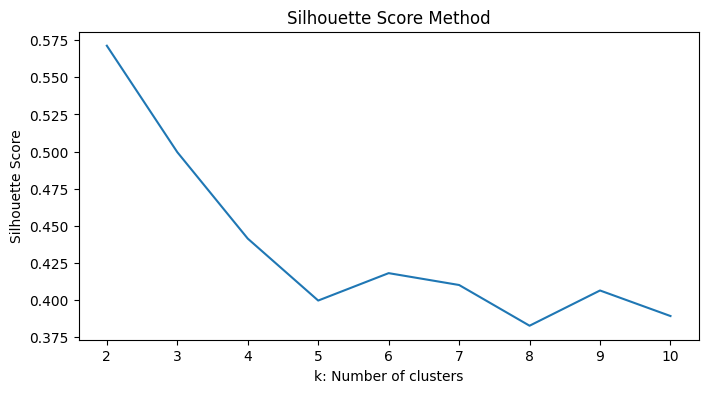

In [12]:
# Initialize variables
kmax = 10  # Maximum number of clusters to test
sil = []  # List to store silhouette scores
numerical_features = ['CustomerID', 'Age', 'Annual Income (k$)_T', 'Spending Score (1-100)_T']
m1 = np.array(df[numerical_features])  # Use only numerical features
# Compute silhouette scores
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric='euclidean'))

# Plot the silhouette scores
plt.figure(figsize=(8, 4))  # Adjust figure size if needed
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel("k: Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()


# Applying K-Means Clustering
From the elbow curve, 5 appears to be the optimum number of clusters.

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[["Annual Income (k$)","Spending Score (1-100)"]])

KMeans(n_clusters=5)

In [14]:
df['kmeans_3'] = kmeans.labels_
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T,kmeans_3
0,1,Male,19,15,39,-1.738999,-0.434801,3
1,2,Male,21,15,81,-1.738999,1.195704,1
2,3,Female,20,16,6,-1.700830,-1.715913,3
3,4,Female,23,16,77,-1.700830,1.040418,1
4,5,Female,31,17,40,-1.662660,-0.395980,3
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061,2
196,197,Female,45,126,28,2.497807,-0.861839,4
197,198,Male,32,126,74,2.497807,0.923953,2
198,199,Male,32,137,18,2.917671,-1.250054,4


# Plotting the results

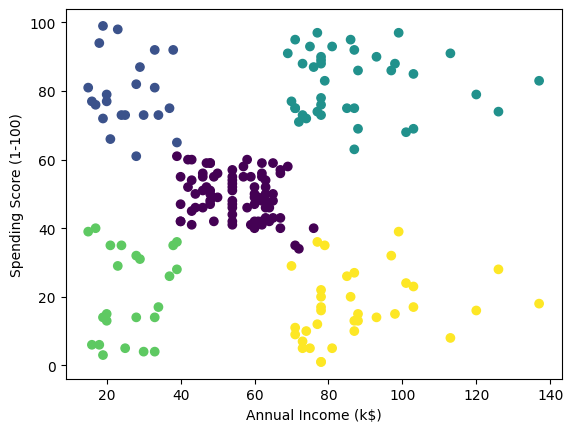

In [15]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['kmeans_3'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

200
(200, 8)


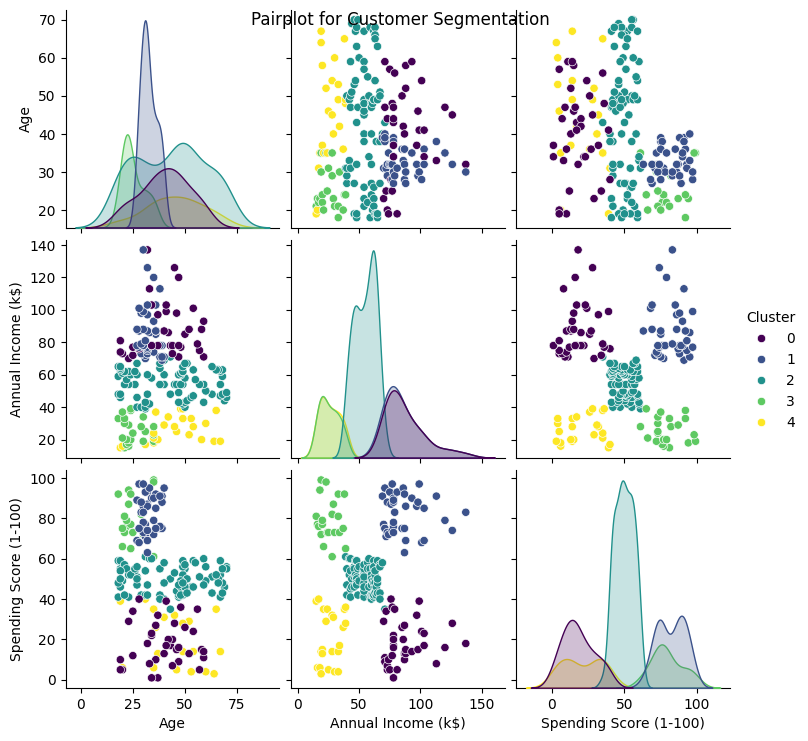

In [16]:

# Assume that you want to cluster based on the 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' columns
kmeans = KMeans(n_clusters=5)  # Replace 5 with the number of clusters you want
kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Generate cluster labels
train_cluster_labels = kmeans.labels_

# Check the length of the cluster labels
print(len(train_cluster_labels))

# Check the shape of your dataframe
print(df.shape)
# If the lengths don't match, you can try to slice your dataframe to match the length of the cluster labels
if len(train_cluster_labels) < df.shape[0]:
    df = df.head(len(train_cluster_labels))

# Now you can assign the cluster labels to a new column in your dataframe
df['Cluster'] = train_cluster_labels

# Now you can create the pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot for Customer Segmentation')
plt.show()

# Testing out with other numbers of clusters

In [17]:
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    df[f'KMeans_{k}'] = kmeans.labels_


In [19]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_T,Spending Score (1-100)_T,kmeans_3,Cluster,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6,KMeans_7
0,1,Male,19,15,39,-1.738999,-0.434801,3,4,0,0,0,1,0,3,0
1,2,Male,21,15,81,-1.738999,1.195704,1,3,0,0,0,1,3,2,4
2,3,Female,20,16,6,-1.700830,-1.715913,3,4,0,0,0,1,0,3,0
3,4,Female,23,16,77,-1.700830,1.040418,1,3,0,0,0,1,3,2,4
4,5,Female,31,17,40,-1.662660,-0.395980,3,4,0,0,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.268791,1.118061,2,1,0,1,2,0,4,4,1
196,197,Female,45,126,28,2.497807,-0.861839,4,0,0,1,1,3,1,5,5
197,198,Male,32,126,74,2.497807,0.923953,2,1,0,1,2,0,4,4,1
198,199,Male,32,137,18,2.917671,-1.250054,4,0,0,1,1,3,1,5,5


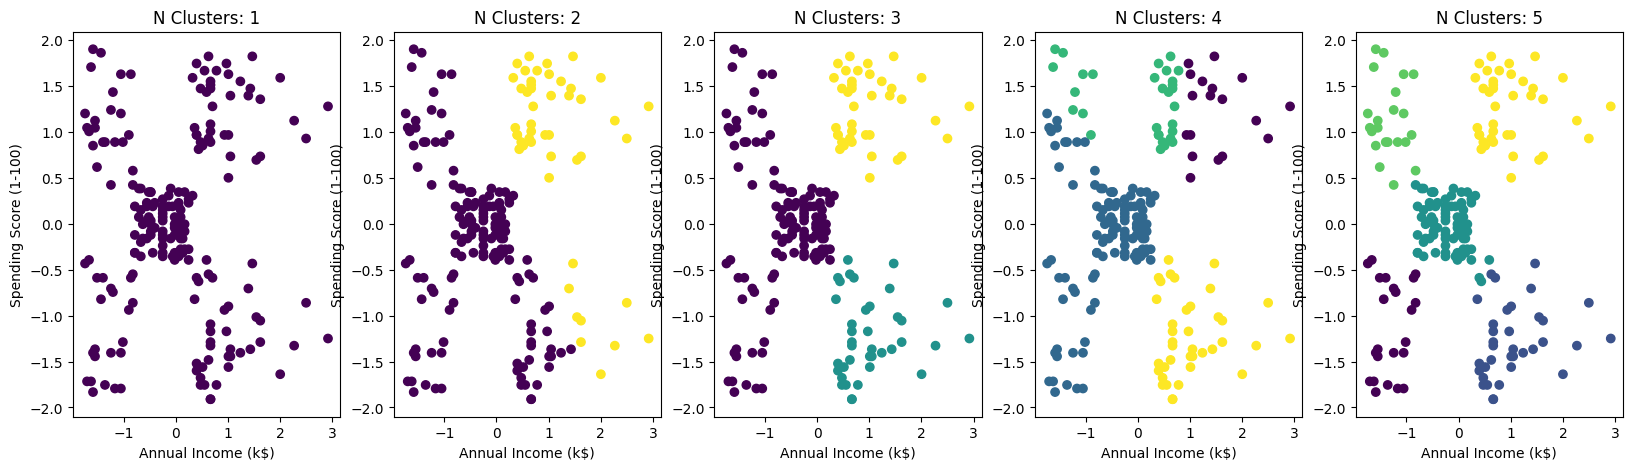

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['Annual Income (k$)_T'], y=df['Spending Score (1-100)_T'], c=df[f'KMeans_{i}'])
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.set_title(f'N Clusters: {i}')


# Conclusion

The scatter plot with k=5 illustrates the segmentation of data points into distinct clusters; each representing groups with similar income and spending behaviors. The dense regions within each cluster signify a high concentration of individuals with comparable characteristics, such as income levels and spending scores.

For example, the tightly packed yellow cluster in the center suggests a group with low variability in these traits. The more dispersed green cluster at the top left indicates greater diversity within that segment.


